#✅ Importar bibliotecas necessárias


In [3]:
import pandas as pd
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


#✅  Definição de Listas e gerando os Dados




In [4]:
# Listas de valores possíveis
modelos = ["Mottu Sport", "Mottu E", "Mottu Pop"]
condicoes = ["Nova", "Usada", "Manutenção"]
patios = ["Unidade Belém", "Unidade Tatuapé", "Unidade Santo Amaro", "Unidade Mooca", "Unidade Lapa"]

# Função para gerar lógica de distribuição com pesos
def gerar_dados_modelo():
    prob = random.random()
    if prob < 0.4:
        return "Mottu Sport", random.choices(condicoes, weights=[0.7, 0.2, 0.1])[0], random.choices(patios, weights=[0.1, 0.1, 0.6, 0.1, 0.1])[0]
    elif prob < 0.7:
        return "Mottu E", random.choices(condicoes, weights=[0.2, 0.3, 0.5])[0], random.choices(patios, weights=[0.05, 0.1, 0.05, 0.7, 0.1])[0]
    else:
        return "Mottu Pop", random.choices(condicoes, weights=[0.1, 0.85, 0.05])[0], random.choices(patios, weights=[0.3, 0.2, 0.1, 0.1, 0.3])[0]


#✅ Criação do Dataset e Salvando em CSV


In [5]:
# Criar dataset com 5000 registros
n = 5000
data = []
for i in range(1, n + 1):
    modelo, condicao, patio = gerar_dados_modelo()
    data.append([f"BT-{i:05d}", modelo, condicao, patio])

# Criar DataFrame e salvar em CSV
df_gerado = pd.DataFrame(data, columns=["Dispositivo Bluetooth", "Modelo", "Condição", "Pátio"])
df_gerado.to_csv("motos_dataset.csv", index=False)
print("CSV com dados aprimorados salvo como 'motos_dataset.csv'")


CSV com dados aprimorados salvo como 'motos_dataset.csv'


#✅ Carregamento e Pré-processamento dos Dados





In [6]:
# Carregar o dataset gerado
df = pd.read_csv("motos_dataset.csv")

# Aplicar LabelEncoder nas colunas categóricas
le_cond = LabelEncoder()
le_patio = LabelEncoder()
le_modelo = LabelEncoder()
le_bluetooth = LabelEncoder()

df['Cond_Enc'] = le_cond.fit_transform(df['Condição'])
df['Patio_Enc'] = le_patio.fit_transform(df['Pátio'])
df['Bluetooth_Enc'] = le_bluetooth.fit_transform(df['Dispositivo Bluetooth'])

# Codificar variável alvo (modelo)
y_encoded = le_modelo.fit_transform(df['Modelo'])


#✅ Separação entre Features e Target, e Divisão em Treino/Teste

In [7]:
# Separar features e target
X = df[['Cond_Enc', 'Patio_Enc', 'Bluetooth_Enc']]
y = y_encoded

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#✅Criação e Treinamento do Modelo XGBoost

In [8]:
# Modelo com hiperparâmetros otimizados manualmente
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    max_depth=6,
    learning_rate=0.1,
    n_estimators=150,
    random_state=42
)

# Treinar modelo
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:18:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

#✅Avaliação do Modelo e Matriz de Confusão

Acurácia com ajuste manual: 0.7513


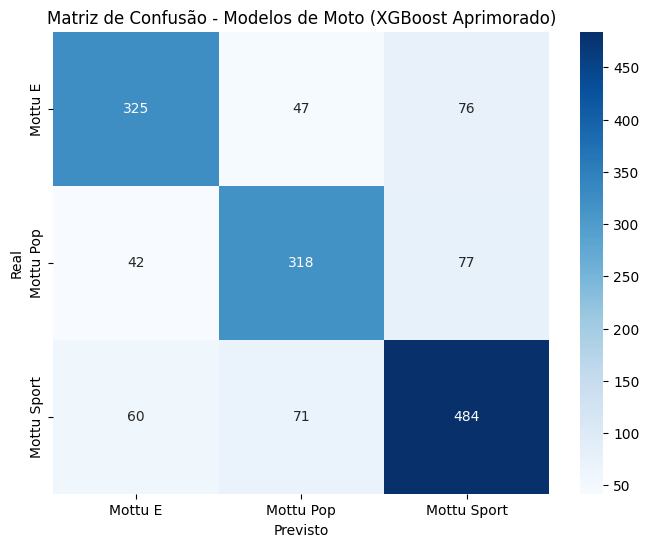

In [9]:
# Previsões
y_pred = model.predict(X_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia com ajuste manual: {acc:.4f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
labels = le_modelo.classes_

# Plotar heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Modelos de Moto (XGBoost Aprimorado)')
plt.show()


#✅Gráfico final

<ipython-input-10-4c06cf432300>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelo_counts.index, y=modelo_counts.values, palette='viridis')


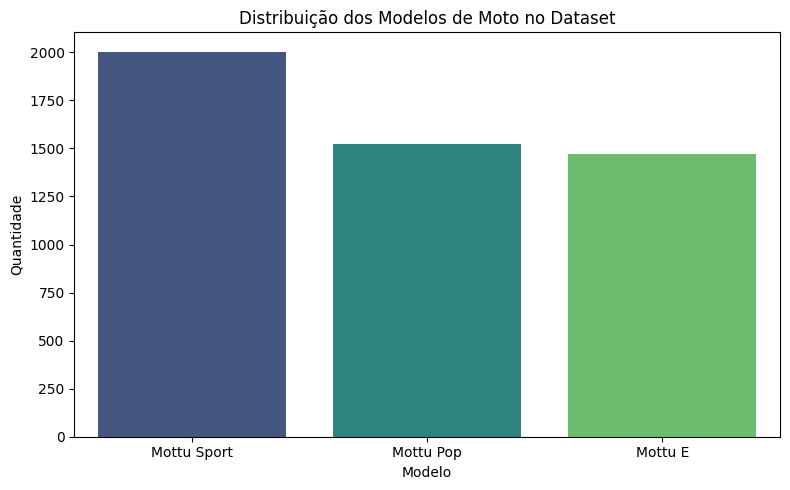

In [10]:
# Contagem de cada modelo
modelo_counts = df['Modelo'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=modelo_counts.index, y=modelo_counts.values, palette='viridis')
plt.title('Distribuição dos Modelos de Moto no Dataset')
plt.xlabel('Modelo')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()
